# CNN Convolution Neural Network 합성곱 신경망

<br></br>

## MNIST

#### - Data

In [1]:
from tensorflow.keras import datasets

mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255, X_test/255

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1)) #--> 뒤에 붙은 1은 channel을 맞춰주기 위해서 이다.

#### - Model

- 모델 구성

	<img src="https://github.com/ElaYJ/supplement/assets/153154981/fec28ec8-d6cc-4bac-abe0-fc41d64177c8" width="%">

In [2]:
from tensorflow.keras import layers, models

model = models.Sequential([
	layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=(28,28,1)),
	layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
	layers.Conv2D(64, kernel_size=(2,2), padding='same', activation='relu'),
	layers.MaxPooling2D(pool_size=(2,2)),
	layers.Dropout(0.25),
	layers.Flatten(),
	layers.Dense(1000, activation='relu'),
	layers.Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [3]:
%%time

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 137s 72ms/step - loss: 0.1149 - accuracy: 0.9640 - val_loss: 0.0367 - val_accuracy: 0.9865
Epoch 2/5
1875/1875 [==============================] - 138s 74ms/step - loss: 0.0450 - accuracy: 0.9861 - val_loss: 0.0293 - val_accuracy: 0.9900
Epoch 3/5
1875/1875 [==============================] - 136s 73ms/step - loss: 0.0327 - accuracy: 0.9899 - val_loss: 0.0317 - val_accuracy: 0.9906
Epoch 4/5
1875/1875 [==============================] - 129s 69ms/step - loss: 0.0255 - accuracy: 0.9915 - val_loss: 0.0460 - val_accuracy: 0.9857
Epoch 5/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0195 - accuracy: 0.9940 - val_loss: 0.0274 - val_accuracy: 0.9913
CPU times: total: 49min 34s
Wall time: 10min 50s


#### - 결과 확인

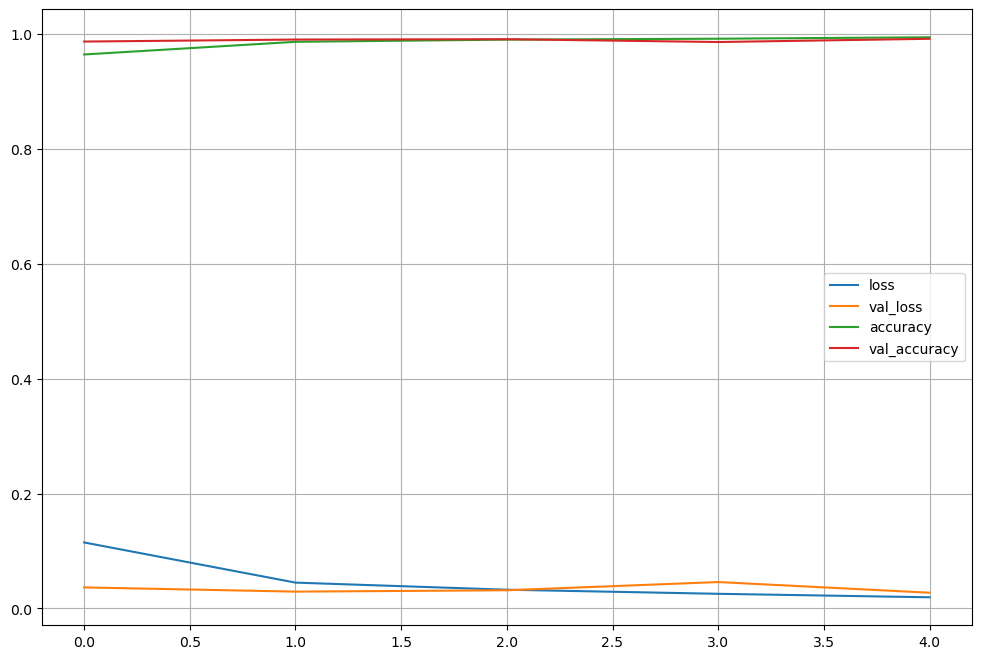

In [4]:
import matplotlib.pyplot as plt

plot_target = ['loss','val_loss','accuracy','val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show() #--> 학습이 너무 잘 된다.

In [6]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1]) #--> Test accuracy : 99%

313/313 [==============================] - 3s 9ms/step - loss: 0.0274 - accuracy: 0.9913
Test loss : 0.027420781552791595
Test accuracy : 0.9912999868392944


In [8]:
# 무엇이 틀렸는지 확인해본다.

import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 3s 8ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [9]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [10]:
# 틀린 데이터의 인덱스만 모은다.

wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

87

In [11]:
# 그 중 16개만 랜덤 샘플링

import random

samples = random.choices(population=wrong_result, k=16)
print(samples)

[2135, 9770, 9749, 6576, 9015, 2070, 5973, 4256, 3520, 5955, 9642, 4256, 1247, 4761, 6625, 5955]


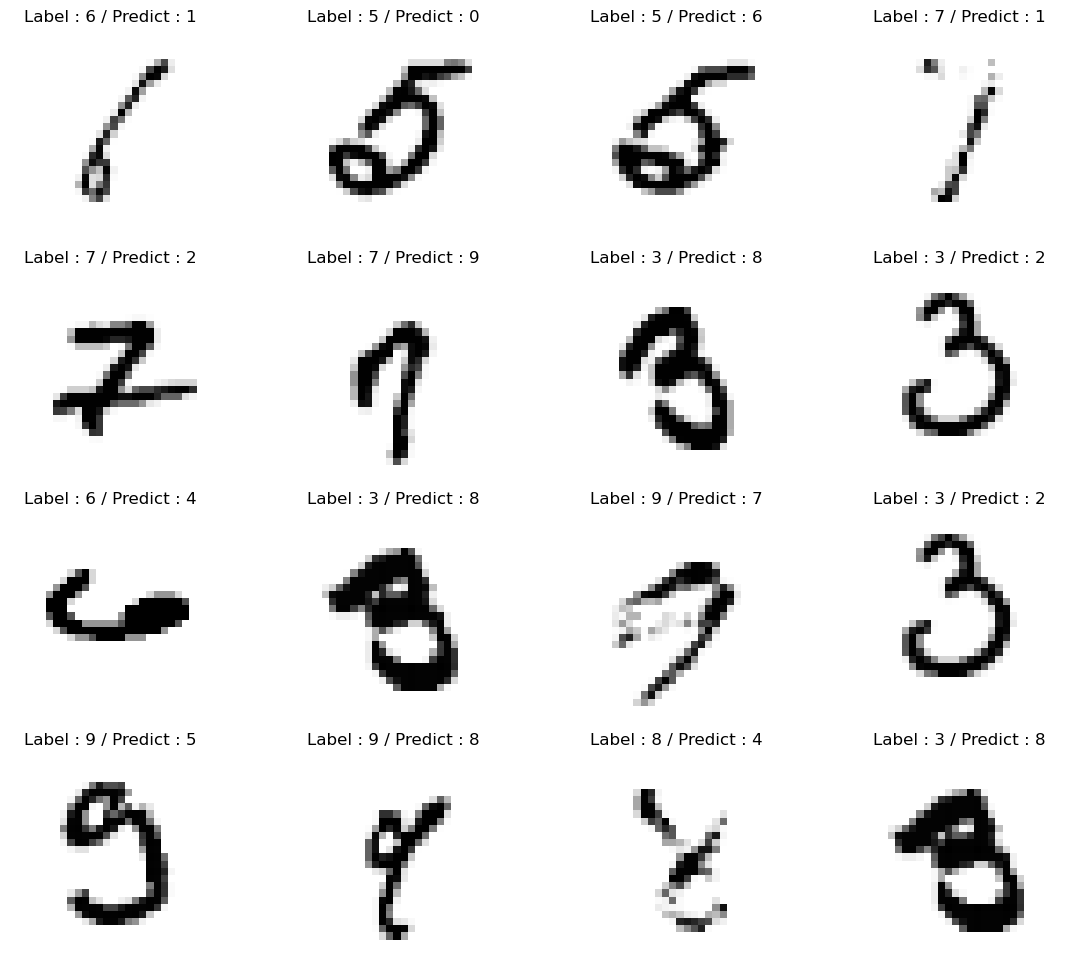

In [13]:
plt.figure(figsize=(14,12))

for i, n in enumerate(samples):
    plt.subplot(4,4, i+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + ' / Predict : ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show() #--> 틀리기 쉬운 1%들...

#### - 모델 저장

In [15]:
model.save("05_MNIST_CNN_model.h5py")

INFO:tensorflow:Assets written to: 05_MNIST_CNN_model.h5py\assets


INFO:tensorflow:Assets written to: 05_MNIST_CNN_model.h5py\assets


<br></br>

## MNIST fashion

#### - Data

In [16]:
from tensorflow.keras import datasets

mnist = datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255, X_test/255
print(X_train.shape, X_test.shape)

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1)) #--> 뒤에 붙은 1은 channel을 맞춰주기 위해서 이다.

(60000, 28, 28) (10000, 28, 28)


#### - Model

In [17]:
from tensorflow.keras import layers, models

model = models.Sequential([
	layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=(28,28,1)),
	layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
	layers.Conv2D(64, kernel_size=(2,2), padding='same', activation='relu'),
	layers.MaxPooling2D(pool_size=(2,2)),
	layers.Dropout(0.25),
	layers.Flatten(),
	layers.Dense(1000, activation='relu'),
	layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

In [18]:
%%time

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 102s 54ms/step - loss: 0.3938 - accuracy: 0.8560 - val_loss: 0.3002 - val_accuracy: 0.8905
Epoch 2/5
1875/1875 [==============================] - 102s 54ms/step - loss: 0.2704 - accuracy: 0.8992 - val_loss: 0.2744 - val_accuracy: 0.8991
Epoch 3/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.2270 - accuracy: 0.9152 - val_loss: 0.2434 - val_accuracy: 0.9123
Epoch 4/5
1875/1875 [==============================] - 107s 57ms/step - loss: 0.1972 - accuracy: 0.9258 - val_loss: 0.2457 - val_accuracy: 0.9115
Epoch 5/5
1875/1875 [==============================] - 108s 57ms/step - loss: 0.1683 - accuracy: 0.9368 - val_loss: 0.2463 - val_accuracy: 0.9064
CPU times: total: 46min 27s
Wall time: 8min 48s


#### - 결과 확인

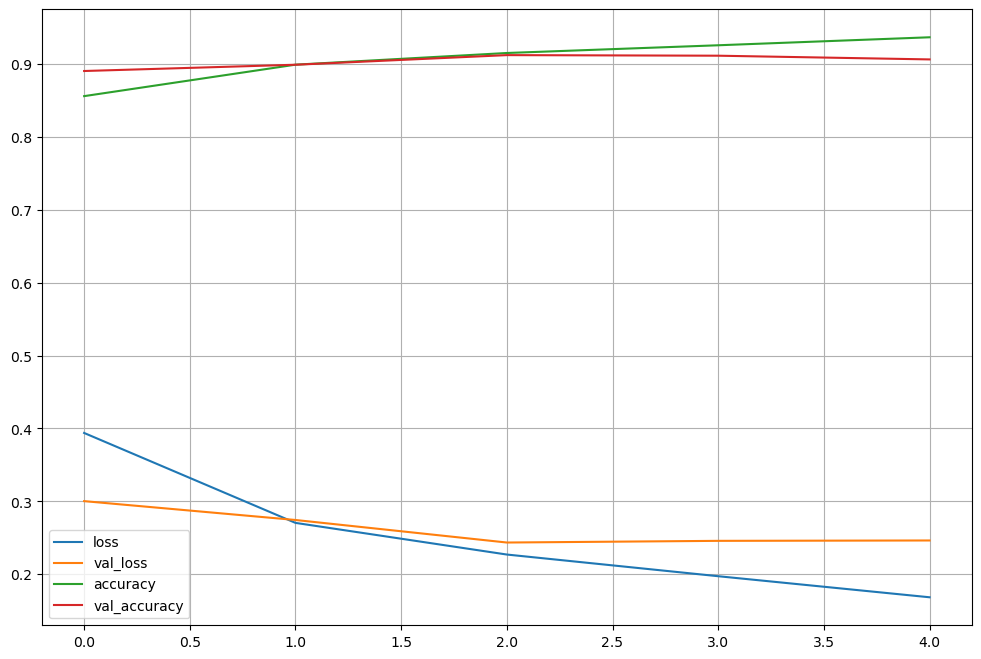

In [19]:
import matplotlib.pyplot as plt

plot_target = ['loss','val_loss','accuracy','val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show() #--> 약간의 과적합이 관찰된다.

In [20]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1]) #--> Test accuracy : 90.6%

313/313 [==============================] - 3s 9ms/step - loss: 0.2463 - accuracy: 0.9064
Test loss : 0.24625319242477417
Test accuracy : 0.9064000248908997
